(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)


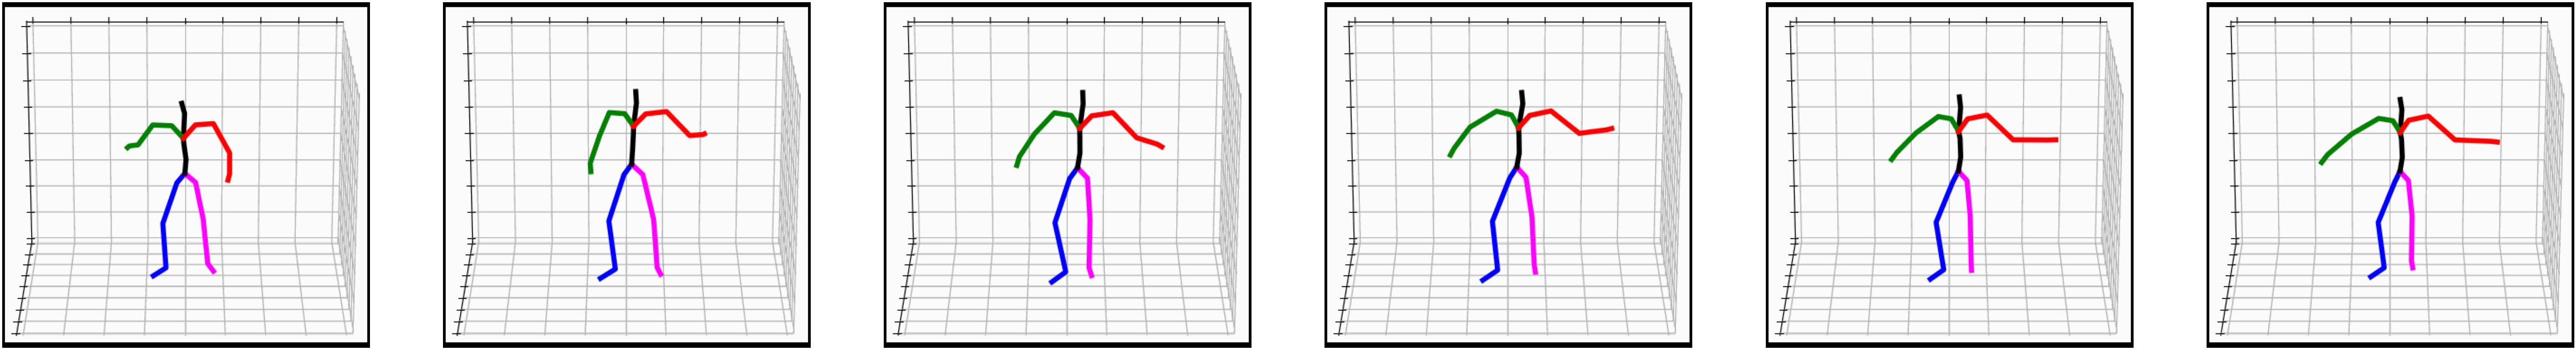

In [3]:
from PIL import Image
import matplotlib.pyplot as plt
import os
import shutil
import cv2
import numpy as np

prefix = 'eval_results/vae/'
dataset = 'humanact12/'
model_name = 'project_net'
pic_name = 'dance0.gif'
interval = 10
lr = 3
ud = lr * 2

gifFileName = prefix + dataset + model_name + "R0/" + pic_name

im = Image.open(gifFileName)
pngDir = gifFileName[:-4]

if os.path.exists(pngDir):
    shutil.rmtree(pngDir)
os.mkdir(pngDir)

fig = plt.figure(figsize=(150, 50), dpi=40)

try:
  for i in range(0, 10000000, interval):
    im.seek(i)
    if i % interval == 0:

        path = pngDir+'/'+str(i)+'.png'

        im.save(path)

        img = cv2.imread(path)
        print(img.shape)

        bkg = np.zeros(img.shape, dtype=np.int)

        l = 130
        r = 530
        u = 50
        d = 420

        bkg[u:d, l:r, :] = img[u:d, l:r, :]
        cropped_img = bkg[u-ud:d+ud, l-lr:r+lr, :]

        plt.subplot(1, 6, i / interval + 1)
        plt.imshow(cropped_img)
        plt.axis('off')

except EOFError:
    pass

plt.show()
# plt.savefig(gifFileName[:-4] + ".jpg")
